# Requirements

In [296]:
# Add as many imports as you need.
import pandas as pd
import seaborn as sns

# Laboratory Exercise - Run Mode (8 points)

## Mobile Device Usage and User Behavior Dataset
The dataset contains detailed information on 700 mobile device users, capturing various usage patterns and behavior classifications. The features include app usage time, screen-on time, battery drain, data consumption, and more. These metrics provide insights into the user's daily interactions with their device, such as how much time is spent on apps, the amount of screen activity, battery usage, and mobile data consumption. In addition, user demographics like age and gender are included, as well as the device model and operating system. The 'user behavior class' attribute categorizes users based on their usage patterns, ranging from light to extreme behavior. All features, except for the 'user behavior class', can be used as input variables for analysis and modeling, while the 'user behavior class' serves as the target variable for prediction. This dataset offers valuable insights for studying mobile user behavior and can be used for building predictive models in the domain of mobile technology and applications.

Load the dataset into a `pandas` data frame.

In [328]:
# Write your code here. Add as many boxes as you need.
data = pd.read_csv('user_behavior_data.csv')
df = data.copy()

In [329]:
df.sample(5)

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
348,349,Google Pixel 5,Android,156,3.8,866,34,510.0,26.0,Male,2
35,36,Samsung Galaxy S21,Android,32,1.2,580,19,153.0,20.0,Female,1
19,20,iPhone 12,iOS,577,8.5,2774,89,2192.0,29.0,Female,5
153,154,OnePlus 9,Android,329,7.5,2277,72,1185.0,27.0,Female,4
456,457,iPhone 12,iOS,74,1.6,587,15,275.0,27.0,Female,1


In [330]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            630 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         560 non-null    float64
 8   Age                         665 non-null    float64
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 60.3+ KB


Preprocess the input and the output variables appropriately.

Explore the dataset using visualizations of your choice.

Check if the dataset is balanced.

<Axes: >

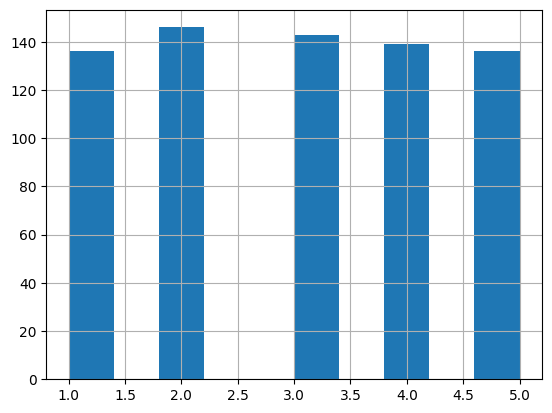

In [331]:
# Write your code here. Add as many boxes as you need.
df['User Behavior Class'].hist()

## Detecting Missing Values
Calculate the percentage of missing values present in each column of the dataset.

In [332]:
# Write your code here. Add as many boxes as you need.
df.isnull().sum() / len(df) * 100

User ID                        0.0
Device Model                   0.0
Operating System              10.0
App Usage Time (min/day)       0.0
Screen On Time (hours/day)     0.0
Battery Drain (mAh/day)        0.0
Number of Apps Installed       0.0
Data Usage (MB/day)           20.0
Age                            5.0
Gender                         0.0
User Behavior Class            0.0
dtype: float64

## Understanding the Causes Behind Missing Values
Using visualization tools such as heatmaps, and dendrograms, illustrate the interdependence between attributes with missing values. Also, visualize the distribution of the missing values within the dataset using matrices and bar charts.

In [333]:
# Write your code here. Add as many boxes as you need.

## Handling the Missing Values
Handle the missing values using suitable method based on the insights obtained from the various visualizations.

In [334]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer, SimpleImputer

In [335]:
def label_data(data:pd.DataFrame, columns:list):
  encoder = LabelEncoder()
  data_copy = data.copy()

  for column in columns:
    data_copy[column] = encoder.fit_transform(data_copy[[column]].astype(str).values.ravel())

    if 'nan' in encoder.classes_:
        data_copy.loc[data_copy[column] == -1, column] = np.nan
  return data_copy

In [336]:
def knn_impute_data(data:pd.DataFrame, columns:list, n_neighbors:int):
  imputer = KNNImputer(n_neighbors=n_neighbors)
  data_copy = data.copy()

  for column in columns:
    data_copy[column] = imputer.fit_transform(data_copy[column].to_numpy().reshape(-1, 1))
  return data_copy

In [337]:
df = label_data(data=df, columns=['Gender', 'Device Model', 'Operating System'])
df = knn_impute_data(data=df, columns=['Operating System'], n_neighbors=3)

In [338]:
df.sample(10)

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
658,659,3,0.0,463,6.8,2358,68,1236.0,43.0,0,4
280,281,2,0.0,73,1.7,403,12,163.0,51.0,1,1
405,406,0,0.0,478,7.3,2340,69,1017.0,43.0,0,4
665,666,4,1.0,198,5.4,1544,53,635.0,53.0,1,3
104,105,3,0.0,166,2.8,1113,28,360.0,25.0,1,2
246,247,0,0.0,71,1.5,590,17,257.0,33.0,1,1
585,586,1,0.0,149,3.1,1191,28,563.0,29.0,1,2
144,145,4,1.0,524,11.2,2417,90,2069.0,29.0,0,5
433,434,1,0.0,46,2.0,309,15,116.0,42.0,1,1
46,47,1,0.0,558,8.4,2447,97,1594.0,22.0,0,5


In [339]:
df.Age = df.Age.fillna(df.Age.median())

In [340]:
df['Data Usage (MB/day)'] = df['Data Usage (MB/day)'].fillna(df['Data Usage (MB/day)'].median())

In [341]:
df.isnull().sum()

User ID                       0
Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64

## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

In [342]:
# Write your code here. Add as many boxes as you need.
from sklearn.model_selection import train_test_split
df = df.drop(columns=['User ID'])
X = df.drop(columns=['User Behavior Class'])
Y = df['User Behavior Class']
Y = Y - 1
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

## Feature Scaling
Standardize the features appropriately.

In [343]:
# Write your code here. Add as many boxes as you need.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Model Selection

Choose and train an approriate model for the given task.

In [344]:
# Write your code here. Add as many boxes as you need.
from xgboost import XGBClassifier
model = XGBClassifier(learning_rate=0.1)

In [345]:
model.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

Use the trained model to make predictions for the test set.

In [346]:
# Write your code here. Add as many boxes as you need.
Y_pred = model.predict(X_test)

Assess the performance of the model by using different classification metrics.

In [347]:
# Write your code here. Add as many boxes as you need.
from sklearn.metrics import accuracy_score, f1_score, classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       0.97      0.97      0.97        38
           2       1.00      0.96      0.98        27
           3       1.00      1.00      1.00        24
           4       1.00      1.00      1.00        30

    accuracy                           0.99       140
   macro avg       0.99      0.99      0.99       140
weighted avg       0.99      0.99      0.99       140



# Laboratory Exercise - Bonus Task (+ 2 points)

As part of the bonus task in this laboratory assignment, your objective is to fine-tune at least one hyper-parameter using a cross-validation with grid search. This involves systematically experimenting with various values for the hyper-parameter(s) and evaluating the model's performance using cross-validation. Upon determining the most suitable value(s) for the hyper-parameter(s), evaluate the model's performance on a test set for final assessment.

Hint: Use the `GridCVSearch` from the `scikit-learn` library. Check the documentation at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html.

## Dataset Splitting
Partition the dataset into training and testing sets with an 90:10 ratio.

In [ ]:
# Write your code here. Add as many boxes as you need.

## Feature Scaling
Standardize the features appropriately.

In [ ]:
# Write your code here. Add as many boxes as you need.

## Fine-tuning the Hyperparameters
Experiment with various values for the chosen hyperparameter(s) and evaluate the model's performance using cross-validation.

In [ ]:
# Write your code here. Add as many boxes as you need.

## Final Assessment of the Model Performance
Upon determining the most suitable hyperparameter(s), evaluate the model's performance on a test set for final assessment.

In [ ]:
# Write your code here. Add as many boxes as you need.